In [5]:
import numpy as np
from sklearn import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.mobilenet_v2 import decode_predictions

import matplotlib.pyplot as plt


In [6]:
import os
num_skipped = 0
for folder_name in ("Cat", "Dog"):

    folder_path = os.path.join("C://Users//mhalama//Desktop//DATA_SET//PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [26]:
#generator bazy danych obrazków kotków i piesków

image_size = (299, 299)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C://Users//mhalama//Desktop//DATA_SET//PetImages",
    validation_split=0.8,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C://Users//mhalama//Desktop//DATA_SET//PetImages",
    validation_split=0.08,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
train_2 = tf.keras.preprocessing.image_dataset_from_directory(
    "C://Users//mhalama//Desktop//DATA_SET//PetImages",
    validation_split=0.95,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 23422 files belonging to 2 classes.
Using 4685 files for training.
Found 23422 files belonging to 2 classes.
Using 1873 files for validation.
Found 23422 files belonging to 2 classes.
Using 1172 files for training.


In [31]:
base_model = keras.applications.Xception(
    weights="imagenet",
    input_shape=(299, 299, 3),
    include_top=False
)


base_model.trainable = False
inputs = keras.Input(shape=(299, 299, 3))
pretreied_input = tf.keras.applications.xception.preprocess_input(inputs)
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(pretreied_input)
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs, outputs)


model.compile(loss='BinaryCrossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


history = model.fit(train_ds, epochs=10, validation_data =val_ds)

# y_pred = model.predict(x_test)

# print(confusion_matrix(x_test, y_pred))

Epoch 1/10
147/147 [==============================] - 563s 4s/step - loss: 7.6594 - accuracy: 0.5025 - val_loss: 7.6865 - val_accuracy: 0.5008
Epoch 2/10
147/147 [==============================] - 545s 4s/step - loss: 7.6219 - accuracy: 0.5059 - val_loss: 7.6865 - val_accuracy: 0.5008
Epoch 3/10
147/147 [==============================] - 546s 4s/step - loss: 7.6219 - accuracy: 0.5059 - val_loss: 7.6865 - val_accuracy: 0.5008
Epoch 4/10
147/147 [==============================] - 534s 4s/step - loss: 7.6219 - accuracy: 0.5059 - val_loss: 7.6865 - val_accuracy: 0.5008
Epoch 5/10
147/147 [==============================] - 527s 4s/step - loss: 7.6219 - accuracy: 0.5059 - val_loss: 7.6865 - val_accuracy: 0.5008
Epoch 6/10
147/147 [==============================] - 526s 4s/step - loss: 7.6219 - accuracy: 0.5059 - val_loss: 7.6865 - val_accuracy: 0.5008
Epoch 7/10
147/147 [==============================] - 527s 4s/step - loss: 7.6219 - accuracy: 0.5059 - val_loss: 7.6865 - val_accuracy: 0.5008

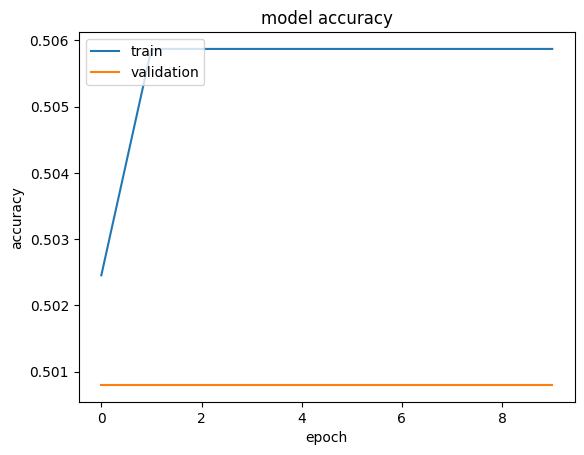

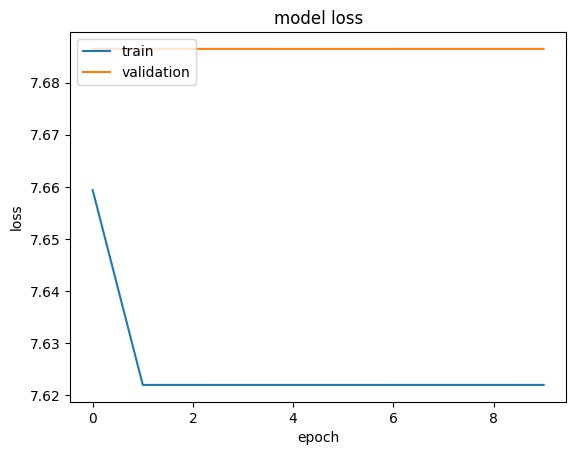

In [32]:
#wykresy funkcji straty i


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
y_pred = np.argmax(model.predict(train_2), axis=1)
y_true = model.predicted(val_ds)

confusion_matrix = metrics.confusion_matrix(y_pred, y_true)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix, display_labels = [False, True])


cm_display.plot()
plt.show()  

37/37 [==============================] - 94s 3s/step


AttributeError: 'Functional' object has no attribute 'predicted'